<a href="https://colab.research.google.com/github/KevOdhiambo/Moringa-Data-Science-W4-Project/blob/main/Moringa_Data_Science_Prep_W4_Independent_Project_2022_04_KEVIN_ODHIAMBO_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Week 4 IP

# **Understanding The Question**

I'm working as a data scientist working for an electric car-sharing service company. I'm tasked to process stations data to understand electric car usage over time by solving for the following research question;

**Research Question**

1.  I'm supposed to Identify the most popular hour of the day for picking up a shared electric car  (Bluecar) in the city of Paris over the month of April 2018.


# **Bonus Questions (Optional)**

1.What is the most popular hour for returning cars?
2.What station is the most popular?
  a). Overall?
  b). At the most popular picking hour?
3.What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?
  a). Overall?
  b). At the most popular picking hour?
4.Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars? 

#**How Will I know My Analysis is Correct?**
if i'm able to answer the research questions then it will show that my project analyis is correct.

#**Step by Step creteria I have used to answer the reserch questions**

1. Loading datasets onto the colab
2. counter check and handle any missing data
3. check for duplicates in the datasets
4. drop any coloumns that are not needed for the analysis
5. create a Paris dataframe for easier analysis
6. Perfom further analysis on the Paris dataframe.




Loading Dataset

In [35]:
#importing Python Libraries and adding plotting parameters

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set()
plt.rcParams['figure.figsize'] = (10.0, 8.0)


In [36]:
#import dataset

df=pd.read_csv('Autolib_dataset.csv')

#preview the dataset
df.head(15)


,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,...,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,...,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,...,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,...,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,...,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,...,NaN,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,NaN,paris-voltaire-8,...,NaN,4,station,ok,nonexistent,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,"Station en parking (niv -1), accÃ¨s 37 rue Leb...",paris-citroencevennes-parking,...,NaN,0,station,closed,nonexistent,2018,4,8,18,20
7,17 Rue des Luaps ProlongÃ©e,3,3,1,0,0,nonexistent,Nanterre,NaN,nanterre-luaps-17,...,NaN,0,station,ok,nonexistent,2018,4,4,22,13
8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,NaN,paris-jeanmoulin-34,...,NaN,4,station,ok,nonexistent,2018,4,2,22,58
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,NaN,paris-anvers-parking,...,NaN,0,station,ok,nonexistent,2018,4,4,15,2


Cleaning Dataset

In [37]:
#dropping Dispalyed at and Scheduled at columns
df.drop(['Displayed comment', 'Scheduled at'], axis=1, inplace=True)

In [38]:
#Renaming columns

new_col = df.columns.tolist()
for col in range(len(new_col)):
  new_col[col] = new_col[col].lower().replace(" ", "_")

df.columns = new_col

df.head()

,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,...,rental_status,slots,station_type,status,subscription_status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,...,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,...,operational,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,...,operational,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,...,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,...,operational,3,station,ok,nonexistent,2018,4,8,17,23


In [71]:
#add date and time feature
df['time'] = df[df.columns[21:23]].apply(lambda x: ":".join(x.astype(str)), axis = 1)
df['date'] = df[df.columns[18:21]].apply(lambda x: '-'.join(x.astype(str)), axis=1)

df

,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,...,status,subscription_status,year,month,day,hour,minute,datetime,time,date
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,...,ok,nonexistent,2018,4,8,11,43,2018-04-08 11:43:00 11:43 2018-4-8,11:43,2018-4-8
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,...,ok,nonexistent,2018,4,6,7,24,2018-04-06 07:24:00 7:24 2018-4-6,7:24,2018-4-6
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,...,ok,nonexistent,2018,4,3,20,14,2018-04-03 20:14:00 20:14 2018-4-3,20:14,2018-4-3
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,...,ok,nonexistent,2018,4,4,4,37,2018-04-04 04:37:00 4:37 2018-4-4,4:37,2018-4-4
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,...,ok,nonexistent,2018,4,8,17,23,2018-04-08 17:23:00 17:23 2018-4-8,17:23,2018-4-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,colombes-menelotte-8,STATION,...,ok,nonexistent,2018,4,6,11,26,2018-04-06 11:26:00 11:26 2018-4-6,11:26,2018-4-6
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,...,ok,nonexistent,2018,4,4,16,56,2018-04-04 16:56:00 16:56 2018-4-4,16:56,2018-4-4
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,paris-bac-142,STATION,...,ok,nonexistent,2018,4,1,7,1,2018-04-01 07:01:00 7:1 2018-4-1,7:1,2018-4-1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,...,ok,nonexistent,2018,4,4,17,27,2018-04-04 17:27:00 17:27 2018-4-4,17:27,2018-4-4


In [46]:
#check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   address              5000 non-null   object
 1   cars                 5000 non-null   int64 
 2   bluecar_counter      5000 non-null   int64 
 3   utilib_counter       5000 non-null   int64 
 4   utilib_1.4_counter   5000 non-null   int64 
 5   charge_slots         5000 non-null   int64 
 6   charging_status      5000 non-null   object
 7   city                 5000 non-null   object
 8   id                   5000 non-null   object
 9   kind                 5000 non-null   object
 10  geo_point            5000 non-null   object
 11  postal_code          5000 non-null   int64 
 12  public_name          5000 non-null   object
 13  rental_status        5000 non-null   object
 14  slots                5000 non-null   int64 
 15  station_type         5000 non-null   object
 16  status

after checking the dataframe infomation, the Scheduled at and Displayed comment columns have less data; hence I have treated them as empty columns thus dropped them.

In [40]:
#check for duplicates
df.duplicated().any()

False

The return 'False' means there are no duplicate values in the dataset

In [41]:
#confirm the data types if they are as they should be
df.dtypes

address                object
cars                    int64
bluecar_counter         int64
utilib_counter          int64
utilib_1.4_counter      int64
charge_slots            int64
charging_status        object
city                   object
id                     object
kind                   object
geo_point              object
postal_code             int64
public_name            object
rental_status          object
slots                   int64
station_type           object
status                 object
subscription_status    object
year                    int64
month                   int64
day                     int64
hour                    int64
minute                  int64
dtype: object

in the data types we can the year, month, day, hour and minute and integers while they should be datetime type

In [42]:
#checking more information about the dataset
df.describe()

,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,postal_code,slots,year,month,day,hour,minute
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.000000,5000.000000,5000.000000
mean,2.333600,2.333600,0.059600,0.123000,0.253400,82634.878400,1.932400,2018.0,4.0,4.941600,11.509200,29.270000
std,2.035274,2.035274,0.246698,0.356506,0.546304,8835.865721,1.905402,0.0,0.0,2.597063,6.893549,17.231741
min,0.000000,0.000000,0.000000,0.000000,0.000000,75001.000000,0.000000,2018.0,4.0,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,75012.000000,0.000000,2018.0,4.0,3.000000,6.000000,14.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,75019.000000,1.000000,2018.0,4.0,5.000000,11.000000,29.000000
75%,4.000000,4.000000,0.000000,0.000000,0.000000,92320.000000,3.000000,2018.0,4.0,7.000000,18.000000,44.000000
max,7.000000,7.000000,2.000000,3.000000,2.000000,95880.000000,7.000000,2018.0,4.0,9.000000,23.000000,59.000000


In [43]:
#check if there is any missing values
df.isnull().sum().sort_values(ascending=False)

#there are no null/mssing values in the dataset

address                0
public_name            0
hour                   0
day                    0
month                  0
year                   0
subscription_status    0
status                 0
station_type           0
slots                  0
rental_status          0
postal_code            0
cars                   0
geo_point              0
kind                   0
id                     0
city                   0
charging_status        0
charge_slots           0
utilib_1.4_counter     0
utilib_counter         0
bluecar_counter        0
minute                 0
dtype: int64

In [44]:
#check for correlation on the dataset
df.corr(method ='kendall')

,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,postal_code,slots,year,month,day,hour,minute
cars,1.000000,1.000000,0.053785,0.077012,-0.264946,0.232869,-0.475883,NaN,NaN,-0.017963,-0.060182,-0.000977
bluecar_counter,1.000000,1.000000,0.053785,0.077012,-0.264946,0.232869,-0.475883,NaN,NaN,-0.017963,-0.060182,-0.000977
utilib_counter,0.053785,0.053785,1.000000,0.087396,-0.039485,0.045747,-0.089332,NaN,NaN,0.000105,-0.025813,0.026578
utilib_1.4_counter,0.077012,0.077012,0.087396,1.000000,-0.078736,0.044864,-0.139024,NaN,NaN,-0.000033,-0.014977,0.006778
charge_slots,-0.264946,-0.264946,-0.039485,-0.078736,1.000000,-0.309767,0.439704,NaN,NaN,-0.004176,-0.004096,0.008751
postal_code,0.232869,0.232869,0.045747,0.044864,-0.309767,1.000000,-0.127798,NaN,NaN,0.005169,0.006822,0.006031
slots,-0.475883,-0.475883,-0.089332,-0.139024,0.439704,-0.127798,1.000000,NaN,NaN,-0.004887,0.005883,0.010952
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
day,-0.017963,-0.017963,0.000105,-0.000033,-0.004176,0.005169,-0.004887,NaN,NaN,1.000000,0.011932,0.012673


From the results i can say that the correlartion of the columns have no strong, weak or any relationship with each other.

In [47]:
# check for cities available in our dataset?
df.city.unique()

#below are the names of cities available in our dataset, however, we only need Paris.

array(['Paris', 'Le Bourget', 'Nanterre', 'Puteaux', 'Fontenay-aux-Roses',
       'Le Chesnay', 'Suresnes', 'Versailles', 'Malakoff',
       'Issy-les-Moulineaux', 'Saint-Cloud', 'SÃ¨vres', 'Bezons',
       'Nogent-sur-Marne', 'CrÃ©teil', 'Villejuif', 'Rueil-Malmaison',
       'Villeneuve-la-Garenne', 'Montreuil', 'Charenton-le-Pont',
       'Courbevoie', 'AsniÃ¨res-sur-Seine', 'Garches', 'Drancy',
       'La Garenne-Colombes', 'VerriÃ¨res-le-Buisson', 'Le Blanc-Mesnil',
       'Vanves', 'Enghien-les-Bains', 'Sceaux', 'Levallois-Perret',
       'Boulogne-Billancourt', 'ChÃ¢tenay-Malabry', 'Pantin', 'Meudon',
       'Gennevilliers', 'Vincennes', 'Rungis', 'Colombes',
       'Fontenay-Sous-Bois', 'Rosny-sous-Bois', 'Bourg-la-Reine',
       'Cachan', 'Maisons-Alfort', 'BiÃ¨vres', 'Alfortville',
       'Champigny-sur-Marne', 'Aulnay-sous-bois', 'Saint-Denis',
       'Le Plessis-Robinson', 'Le PrÃ©-Saint-Gervais', 'Clamart',
       'Bois-Colombes', 'Guyancourt', 'Bagnolet', 'Vaucresson',
  

Data Analysis

In [48]:
#getting Paris information from the dataset
paris=df[df.city == 'Paris']
paris

,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,...,rental_status,slots,station_type,status,subscription_status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,...,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,...,operational,0,station,ok,nonexistent,2018,4,6,7,24
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,...,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,...,operational,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,paris-voltaire-8,STATION,...,operational,4,station,ok,nonexistent,2018,4,6,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,3 avenue d'Ivry,0,0,0,0,2,operational,Paris,paris-ivry-3,STATION,...,operational,6,station,ok,nonexistent,2018,4,9,23,1
4994,15 rue de Rocroy,0,0,0,0,0,operational,Paris,paris-rocroy-15,STATION,...,operational,1,station,ok,nonexistent,2018,4,1,20,49
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,...,operational,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,paris-bac-142,STATION,...,operational,4,station,ok,nonexistent,2018,4,1,7,1


In [49]:
#find the stations present in Paris DataFrame
paris.id.unique()

#the stations are the ones which will lead to our main objective

array(['paris-suffren-2', 'paris-raymondlosserand-145',
       'paris-eugeneoudine-51', 'paris-portedechamperret-6',
       'paris-voltaire-8', 'paris-citroencevennes-parking',
       'paris-jeanmoulin-34', 'paris-anvers-parking', 'paris-censier-14',
       'paris-richardlenoir-8', 'paris-voltaire-182',
       'paris-cambronne-parking', 'paris-renecoty-11',
       'paris-catalogne-2', 'paris-emiledeschanel-15',
       'paris-faubourgsaintmartin-203', 'paris-danton-8',
       'paris-boucry-35', 'paris-pontlouisphilippe-24',
       'paris-miollis-21', 'paris-sorbier-14', 'paris-londres-6',
       'paris-fredericklemaitre-5', 'paris-clichy-70', 'paris-mozart-68',
       'paris-claudebernard-16', 'paris-georgesmandel-42',
       'paris-grandearmee-81', 'paris-reille-59', 'paris-tolbiac-41',
       'paris-fabredeglantine-2', 'paris-republique-17',
       'paris-sevresbabylone-parking', 'paris-raymondlosserand-229',
       'paris-murat-1', 'paris-pompe-137', 'paris-guypatin-10',
       'pari

In [50]:
#checking for rental status in Paris

paris.rental_status.value_counts()

#this shows how many station are available for renting a car from. 

operational    2629
broken          175
future            9
nonexistent       3
Name: rental_status, dtype: int64

In [53]:
#check the station type
paris['station_type'].value_counts()

station         2672
full_station     141
subs_center        3
Name: station_type, dtype: int64

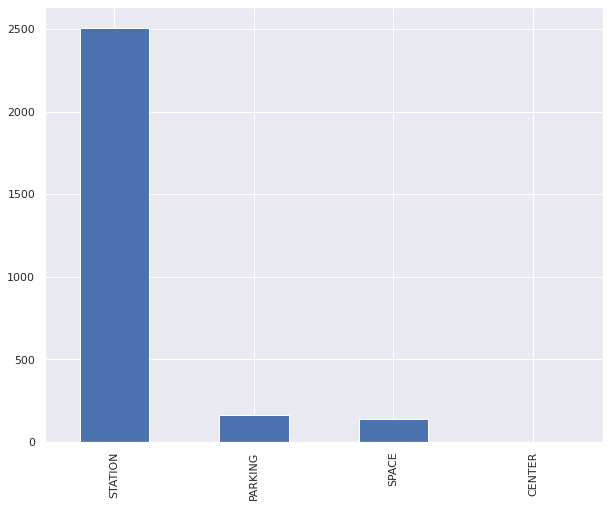

In [54]:
#Investigatin the kind variable 
paris.kind.value_counts().plot(kind='bar')

#the 'Station' and 'Space' have resources to accomodate Bluecar while, 'Center' has no resouces at all and 'Parking' can accomodate Utliib.

In [61]:
#next thing is filtering out stations based on 'Operational' by status, kind, scheduled status and type.
stations_used=paris[paris.rental_status == 'operational']

stations_used=stations_used[stations_used.kind != 'CENTER']

stations_used = stations_used[stations_used.status != 'scheduled']

stations_used = stations_used[stations_used.station_type != 'subs_center']







In [62]:
#now, we confirm how many times every station appears in Paris, the less appearing stations means they are less used as such we dont need them in the dataset
stations_number= stations_used.id.value_counts(ascending=False)
stations_number

paris-portedemontrouge-8         13
paris-courcelles-69              11
paris-voltaire-182               11
paris-mathis-35                  11
paris-philippeauguste-126        11
                                 ..
paris-chausseedantin-5            1
paris-portepouchet-6              1
paris-faubourgsaintmartin-168     1
paris-maine-4                     1
paris-cognacqjay-20               1
Name: id, Length: 567, dtype: int64

In [64]:
#take only the stations that appear more than once
most_used_stations = stations_number[stations_number > 1 ].index.tolist()

#remove in active stations
stations_used =stations_used[stations_used['id'].isin(most_used_stations)]
stations_used.head()


,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,...,rental_status,slots,station_type,status,subscription_status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,...,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,...,operational,0,station,ok,nonexistent,2018,4,6,7,24
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,...,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,...,operational,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,paris-voltaire-8,STATION,...,operational,4,station,ok,nonexistent,2018,4,6,7,2


To arrive at our main research question, we find the difference in the stations used dataframe and use the difference to get the results

In [79]:
#difference in the stations_used dataframe
stations_used["difference"]=stations_used.bluecar_counter.diff()
stations_used

#a negative difference means the car has been picked while a positive difference means drop off time.

,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,...,slots,station_type,status,subscription_status,year,month,day,hour,minute,difference
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,...,2,station,ok,nonexistent,2018,4,8,11,43,NaN
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,...,0,station,ok,nonexistent,2018,4,6,7,24,6.0
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,...,2,station,ok,nonexistent,2018,4,4,4,37,-3.0
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,...,3,station,ok,nonexistent,2018,4,8,17,23,0.0
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,paris-voltaire-8,STATION,...,4,station,ok,nonexistent,2018,4,6,7,2,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,3 avenue d'Ivry,0,0,0,0,2,operational,Paris,paris-ivry-3,STATION,...,6,station,ok,nonexistent,2018,4,9,23,1,0.0
4994,15 rue de Rocroy,0,0,0,0,0,operational,Paris,paris-rocroy-15,STATION,...,1,station,ok,nonexistent,2018,4,1,20,49,0.0
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,...,2,station,ok,nonexistent,2018,4,4,16,56,4.0
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,paris-bac-142,STATION,...,4,station,ok,nonexistent,2018,4,1,7,1,-3.0


1. Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

In [80]:
#showing the most popular hour picking time for cars in paris in April 2018

popular_pickup_hour=stations_used[(stations_used.difference < 0)].groupby(["hour"])['difference'].sum()
popular_pickup_hour.sort_values(ascending=False).head(1)


hour
12   -79.0
Name: difference, dtype: float64

12 noon is the time most electric cars were picked in Paris

In [81]:
#popular hour of drop off
popular_pickup_hour=stations_used[(stations_used.difference > 0)].groupby(["hour"])['difference'].sum()
popular_pickup_hour.sort_values(ascending=False).head(1)

hour
3    152.0
Name: difference, dtype: float64

6am is the popular time for returning most Bluecars

In [75]:
#most popular station
df["difference"] = df.bluecar_counter.diff()
df
#the first station in the preview is the most popular station.

,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,...,subscription_status,year,month,day,hour,minute,datetime,time,date,difference
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,...,nonexistent,2018,4,8,11,43,2018-04-08 11:43:00 11:43 2018-4-8,11:43,2018-4-8,NaN
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,...,nonexistent,2018,4,6,7,24,2018-04-06 07:24:00 7:24 2018-4-6,7:24,2018-4-6,6.0
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,...,nonexistent,2018,4,3,20,14,2018-04-03 20:14:00 20:14 2018-4-3,20:14,2018-4-3,-3.0
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,...,nonexistent,2018,4,4,4,37,2018-04-04 04:37:00 4:37 2018-4-4,4:37,2018-4-4,0.0
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,...,nonexistent,2018,4,8,17,23,2018-04-08 17:23:00 17:23 2018-4-8,17:23,2018-4-8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,colombes-menelotte-8,STATION,...,nonexistent,2018,4,6,11,26,2018-04-06 11:26:00 11:26 2018-4-6,11:26,2018-4-6,2.0
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,...,nonexistent,2018,4,4,16,56,2018-04-04 16:56:00 16:56 2018-4-4,16:56,2018-4-4,2.0
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,paris-bac-142,STATION,...,nonexistent,2018,4,1,7,1,2018-04-01 07:01:00 7:1 2018-4-1,7:1,2018-4-1,-3.0
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,...,nonexistent,2018,4,4,17,27,2018-04-04 17:27:00 17:27 2018-4-4,17:27,2018-4-4,1.0
